## CHAPTER 5. 오차역전파법

####    

### 5. 1 계산 그래프 

In [9]:
from PIL import Image
im = Image.open('deep_learning_images/abc.png')

#### 문제2: 현빈은 슈퍼에서 사과 2개, 귤 3개 샀다. 사과는 1개 100원 , 귤은 1개 150원 , 소비세는 10% 일때 지불 금액?

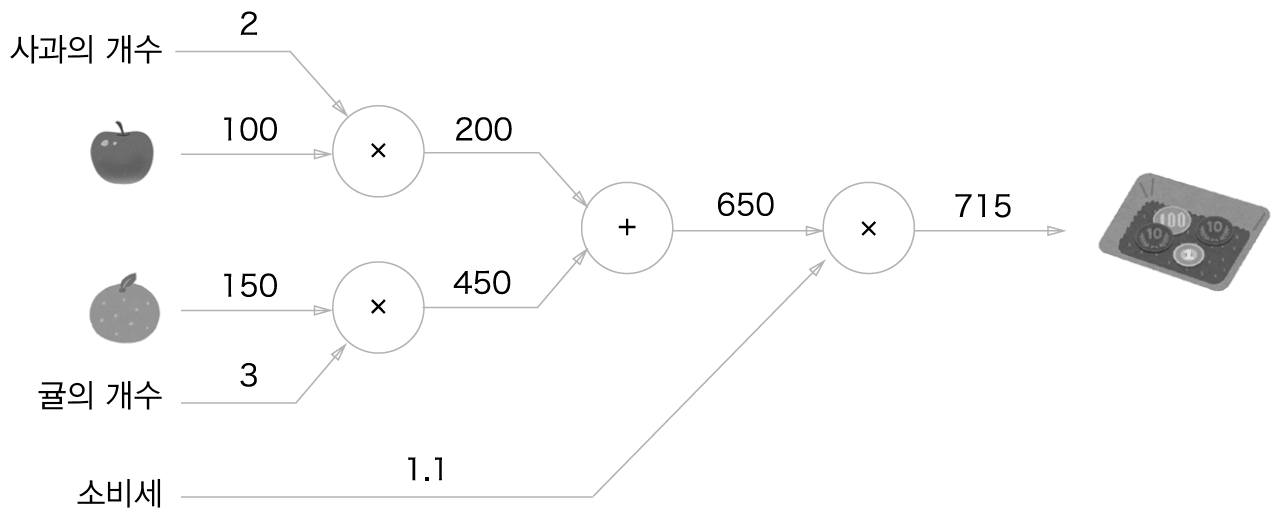

In [10]:
im

- 계산 그래프를 구성한다.
- 그래프에서 계산을 왼쪽에서 오른쪽으로 진행 -> 순전파라고 함

####    

#### 국소적 계산

- 계산 그래프의 특징은 국소적 계산을 전파함으로써 최종 결과를 얻는다.
- 국소적계산이란 자신과 직접 관계된 작은 범위란 뜻
- 이 국소적 계산이 계산 그래프의 이점 -> 미분을 효율적으로 하게 됨


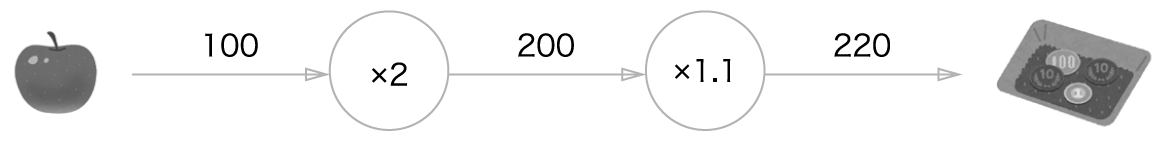

In [14]:
im2 = Image.open('deep_learning_images/fig 5-1.png')
im3 = Image.open('deep_learning_images/fig 5-14.png')
im2

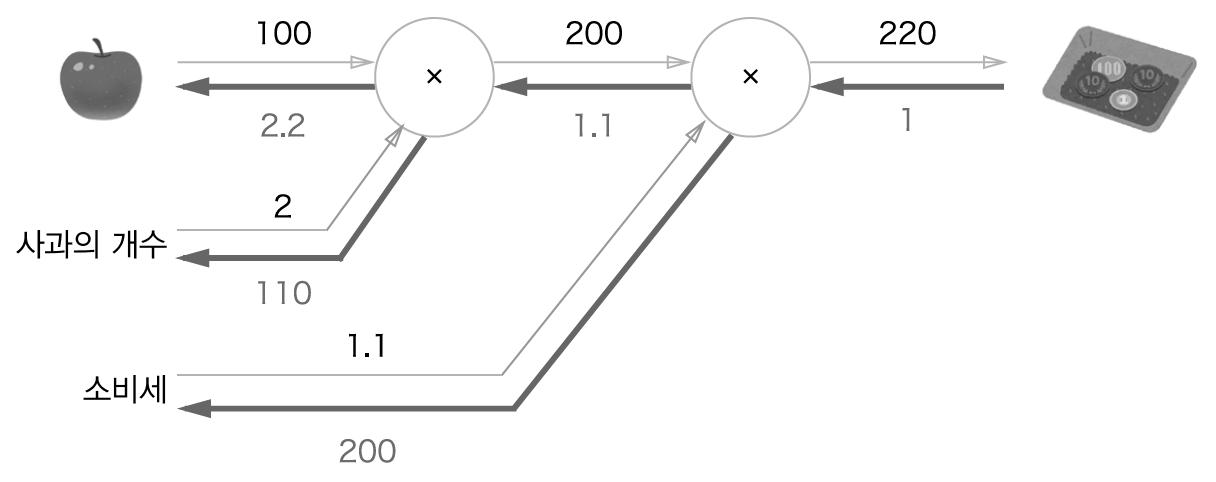

In [15]:
im3

- 문제 1 은 사과 2개를 사서 소비세를 포함한 최종 금액을 구하기
- 그 밑은 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는가 즉, 사과 가격에 대한 지불 금액의 미분을 구하는 것 
- 미분은 역전파를 하면 구할 수가 있다(두번째 그림) 굵은 직선 
- 계산그래프의 이점은 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것 

####     

- 계산 그래프에서 국소적 미분을 전달하는 원리

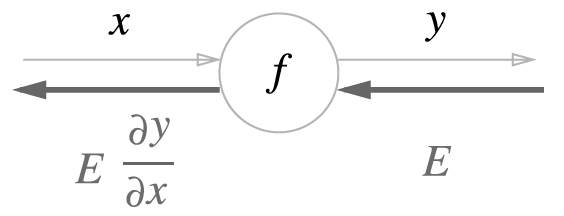

In [19]:
im4 = Image.open('deep_learning_images/fig 5-6.png')
im4

- 역전파를 나타낸 그림 
- 신호 E에 노드의 국소적 미분을 곱한 후 다음 노드로 전달하는 것 
- 즉 y=f(x) 의 계산을 구하여 앞쪽 노드에 전달

####      

###      연쇄법칙

In [27]:
im4 = Image.open('deep_learning_images/e 5.3.png')
im5 = Image.open('deep_learning_images/e 5.4.png')

#### 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

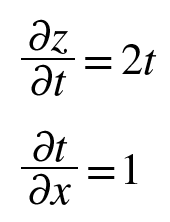

In [28]:
im4

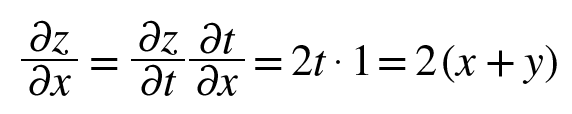

In [29]:
im5

- 연쇄법칙을 이용한 미분구하는 과정을 계산 그래프로 표현

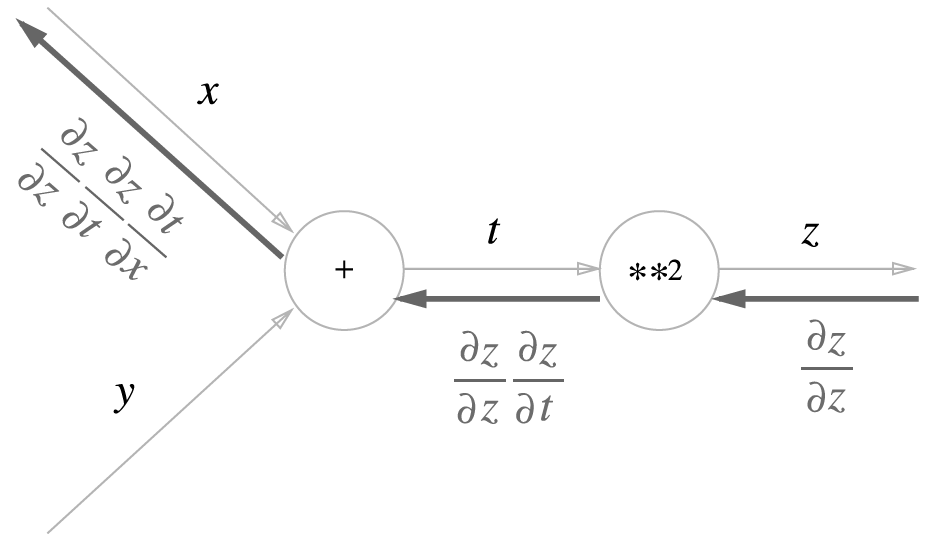

In [30]:
im5 = Image.open('deep_learning_images/fig 5-7.png')
im5

- 2제곱 계산 : **2

####      

### 역전파

#### 1. 덧셈 노드의 역전파

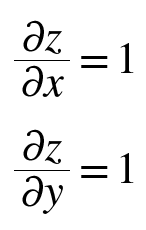

In [39]:
im5 = Image.open('deep_learning_images/e 5.5.png')
im5

- z = x + y 의 미분
- 즉 1을 곱하므로 그대로 흘려보냄

####      

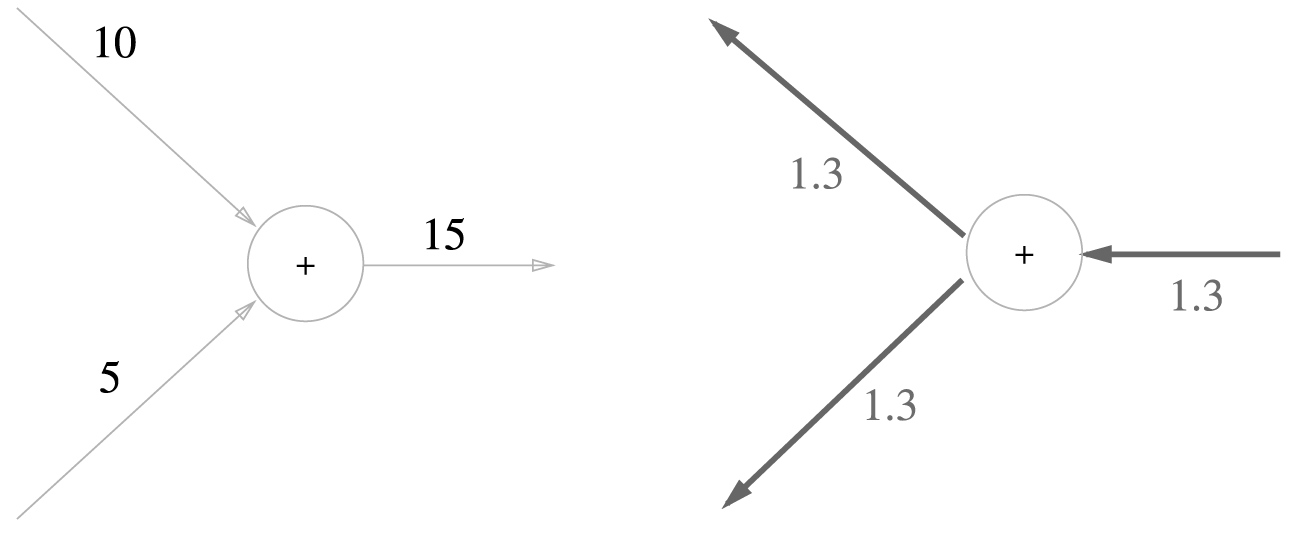

In [34]:
im5 = Image.open('deep_learning_images/fig 5-11.png')
im5

- 덧셈 노드 역전파는 입력 신호를 다음 노드로 출력할 뿐이므로 1.3을 그대로 다음 노드로 전달

####           

#### 2. 곱셈 노드의 역전파

- z = xy 의 편미분 결과

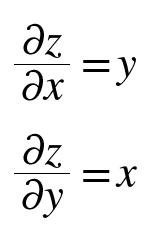

In [45]:
im5 = Image.open('deep_learning_images/e 5.6.png')
im6 = Image.open('deep_learning_images/fig 5-13.png')
im5

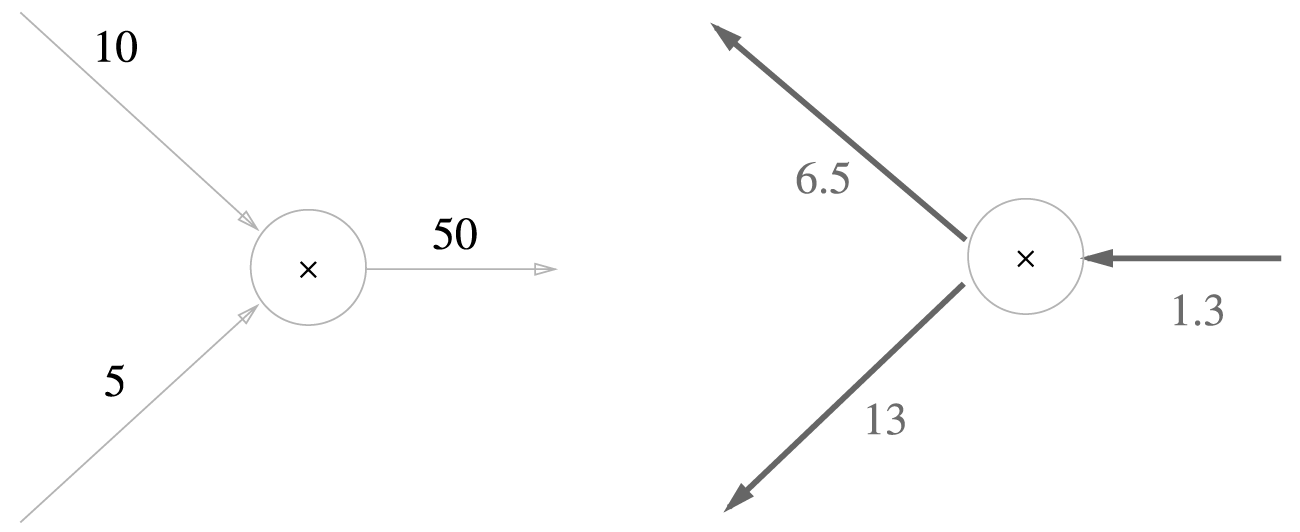

In [46]:
im6

- 10 x  5 = 50 이라는 계산에서 역전파 때 상류에서 1.3값이 흘러온다하자.
- 입력 신호를 바꾼 값을 곱하여 하나는 1.3 x 5 = 6.5  / 1.3 x 10 = 13 이 된다.
- 따라서 곱셉 노드의 역전파에서는 순전파의 입력 신호가 필요!

####      

### 5.4 단순한 계층 구현하기

#### 곱셈 계층

In [55]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
 
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y 
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

- __init__()는 인스턴스 변수인 x, y를 초기화
- x,y 변수는 순전파 시의 입력값을 유지하기 위해 사용
- forward()에서는 x, y를 인수로 받고 두 값을 곱해서 반환
- backward()에서는 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 흘러보냄

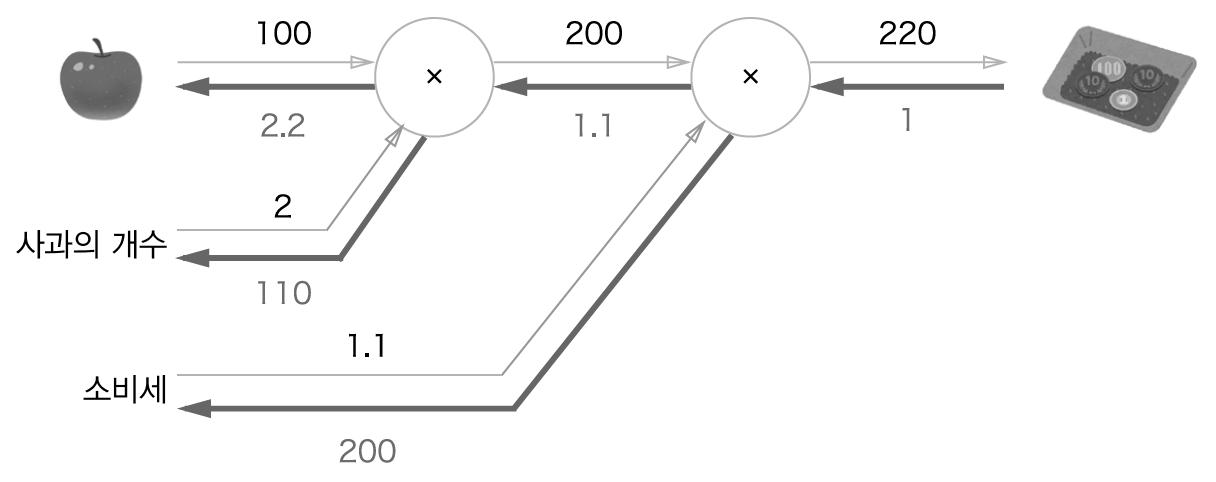

In [51]:
im5 = Image.open('deep_learning_images/fig 5-14.png')
im5

In [56]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [58]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


- backward()가 받는 인수는 순전파의 출력에 대한 미분
- 위 코드에서 mul_apple_layer 라는 곱셈 계층은 순전파대는 apple_price 출력
- 역전파 때는 apple_layer의 미분 값인 dapple_price를 인수로 받는다. 

####     

#### 덧셈 계층

In [62]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y 
        return out
    
    def backward(self, dout):
        dx = dout * 1 
        dy = dout * 1 
        return dx , dy

- 덧셈 계층에서는 초기화가 필요없다 ( pass 는 아무것도 하지말라는 뜻)
- forward에서는 입력받은 두 인수를 더해서 반환함
- backward 에서는 상류에서 내려온 미분(dout)를 그대로 하류로 흘린다.

####    

### 활성화 함수 계층 구현하기

#### ReLU 계층

In [73]:
im5 = Image.open('deep_learning_images/e 5.7.png')
im6 = Image.open('deep_learning_images/e 5.8.png')
im7 = Image.open('deep_learning_images/fig 5-18.png')

#### ReLU 수식

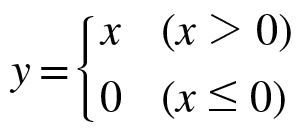

In [72]:
im5

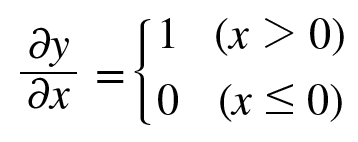

In [69]:
im6

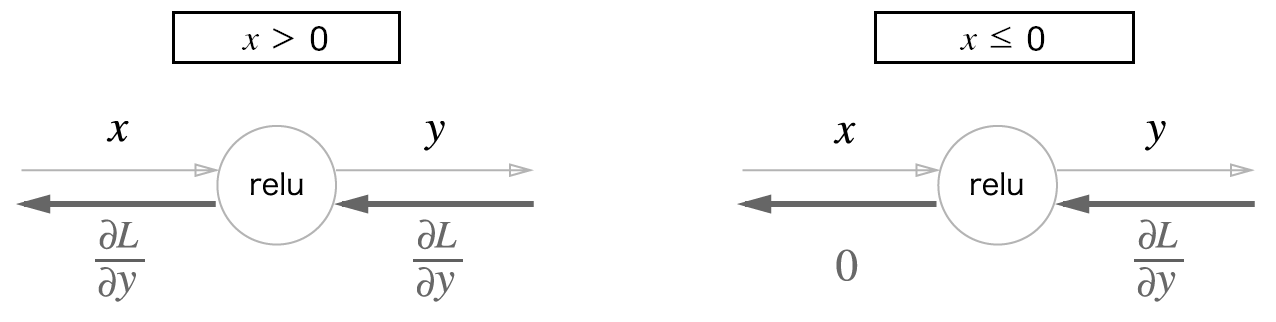

In [75]:
im7

- 순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 흘리고 x가 0 이하면 신호 보내지 않는다.

####       

#### 구현

In [79]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

- Relu 클래스는 mask 라는 인스턴스 변수를 가진다.
- mask는 T/F 로 구성된 넘파이 배열
- 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True 그 외(0보다 큰 원소)는 False 로 유지

In [82]:
## example
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x <= 0 )
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


####     

#### Sigmoid 계층

In [89]:
im5 = Image.open('deep_learning_images/fig 5-19.png')
im6 = Image.open('deep_learning_images/e 5.10.png')
im7 = Image.open('deep_learning_images/fig 5-19(1).png')
im8 = Image.open('deep_learning_images/fig 5-19(2).png')
im9 = Image.open('deep_learning_images/fig 5-19(3).png')
im10 = Image.open('deep_learning_images/fig 5-20.png')

#### 시그모이드 계층의 순전파 그림

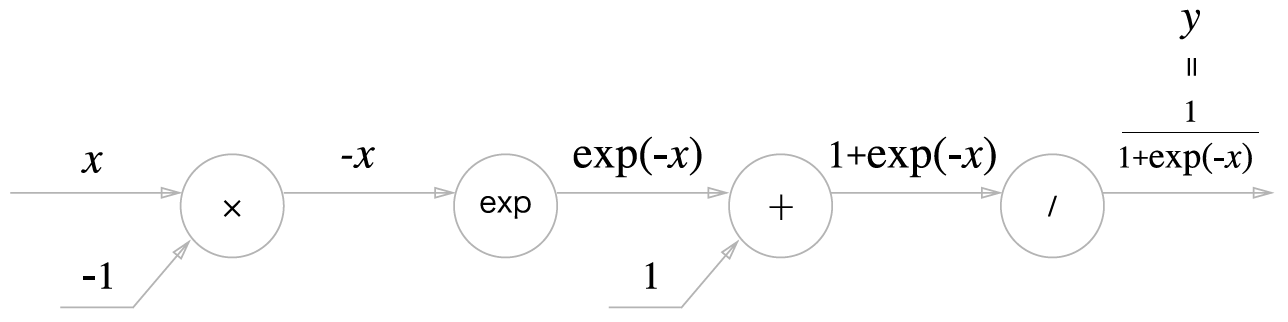

In [85]:
im5

- '/' 노드는 y= 1/x 계산을 수행 , 'exp' 노드는 y = exp(x) 계산을 수행

####        

#### 시그모이드 계층 역전파 흐름  

##### 1단계

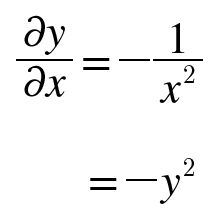

In [90]:
im6

- 위 식에 따르면 역전파 때는 상류에서 흘러온 값에 -y^2(순전파 제곱의 마이너스)를 곱해서 하류로 전달

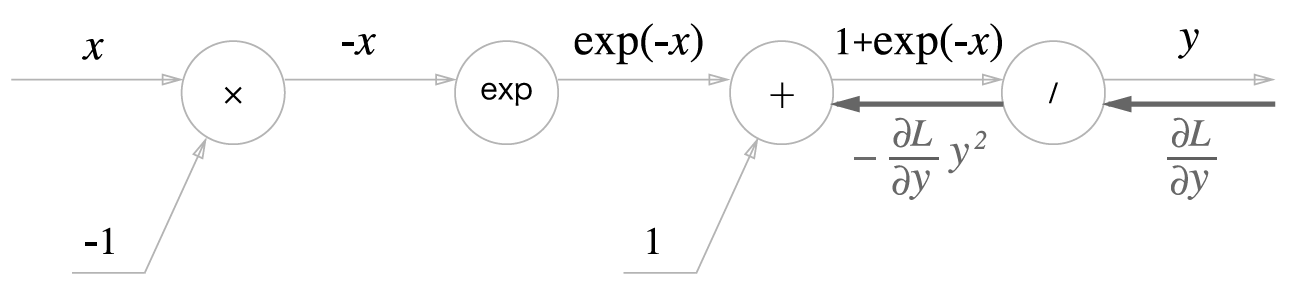

In [91]:
im7

- 이를 계산그래프로 표현한 것 

####      

#### 2단계

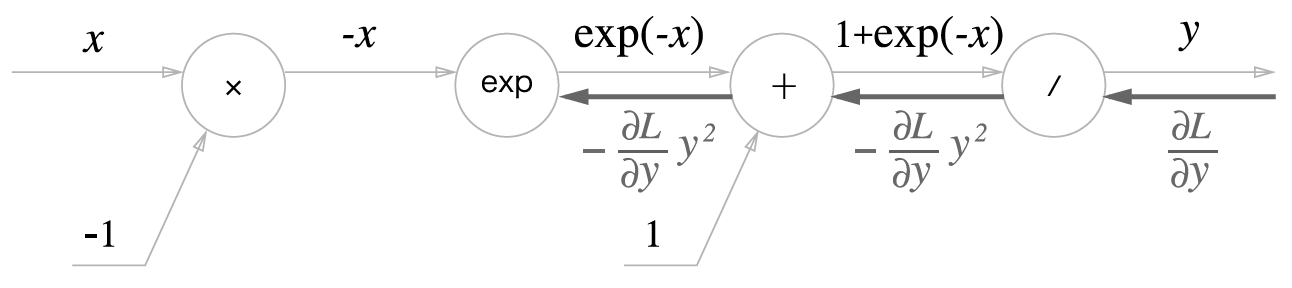

In [95]:
im8

- '+'노드는 상류의 값을 여과 없이 하류로 내보는게 끝

####      

#### 3단계

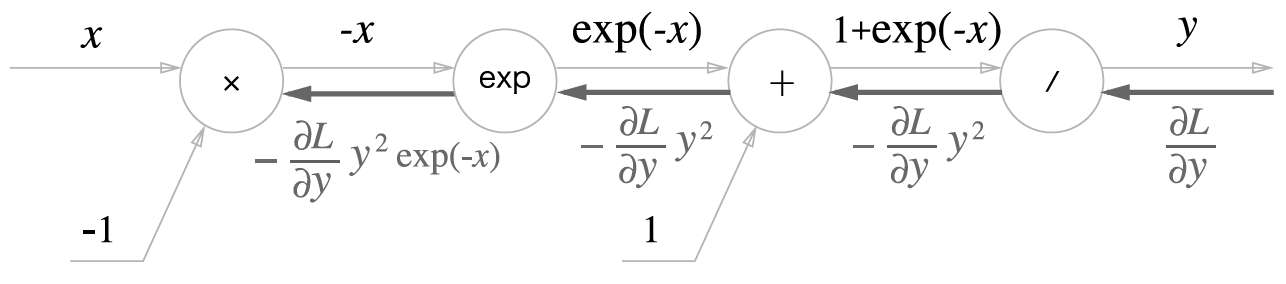

In [98]:
im9

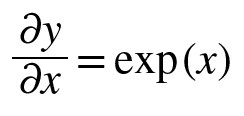

In [101]:
im8 = Image.open('deep_learning_images/e 5.11.png')
im8

- 'exp' 노드는 y = exp(x) 연산을 수행하며 미분값은 위와 같음
- 계산 그래프에서는 상류의 값에 순전파 때의 출력(exp(-x))을 곱해 하류로 전달

####      

#### 4단계

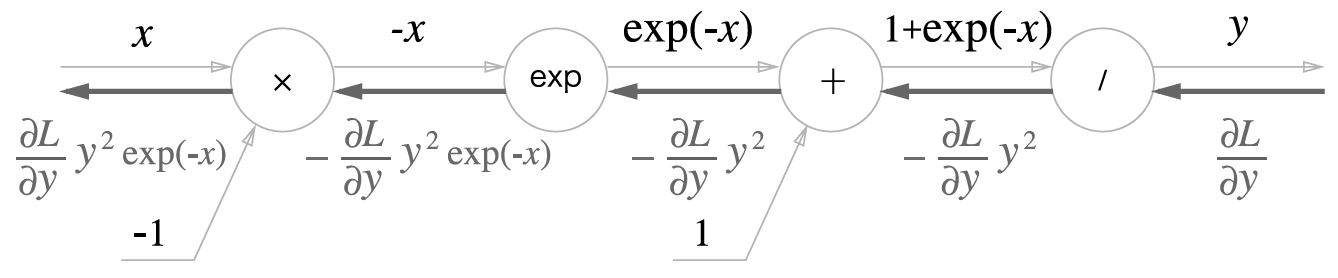

In [106]:
im10

- 'x'노드는 순전파 때의 값을 서로 바꿔 곱한다. 위 예에서는 -1 을 곱함

#### 역전파 결론 정리

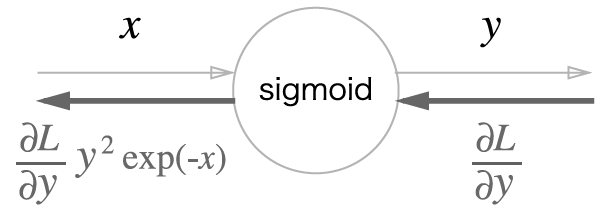

In [114]:
im11 = Image.open('deep_learning_images/fig 5-21.png')
im13 = Image.open('deep_learning_images/fig 5-22.png')
im12 = Image.open('deep_learning_images/e 5.12.png')
im11

- 시그모이드의 역전파 계산은 순전파의 x와 y만으로 계산할 수있다.
- 즉 sigmoid 노드 하나로 대체할수 있다는 말

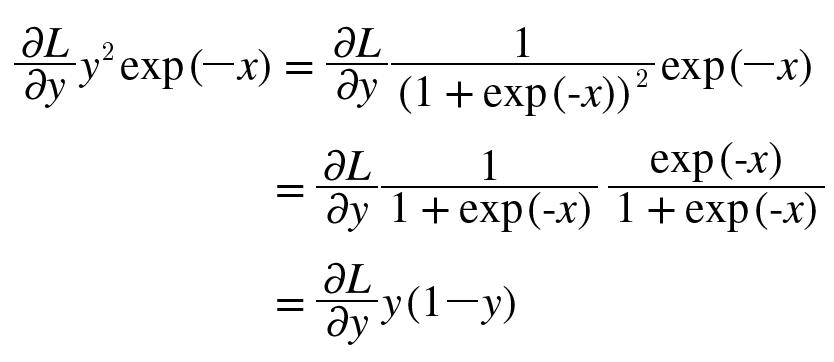

In [115]:
im12

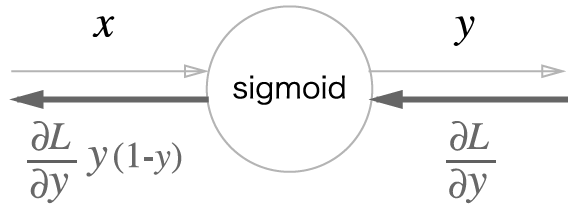

In [116]:
im13

- 위의 수식에 의해 간소화하는 것이 가능

####     

#### 구현

In [120]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

####     

### 5. 6 Affine/Softmax 계층 구현

#### Affine 계층

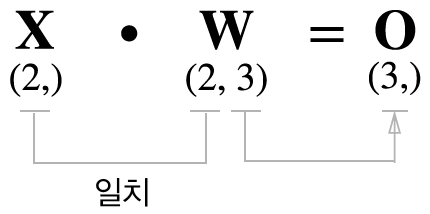

In [124]:
im1 = Image.open('deep_learning_images/fig 5-23.png')
im1

- 행렬의 내적에서는 대응하는 차원의 원소 수를 일치시킨다.
- 신경망의 순전판 때 수행하는 행렬의 내적을 기하학에서 어파인 변환이라 함

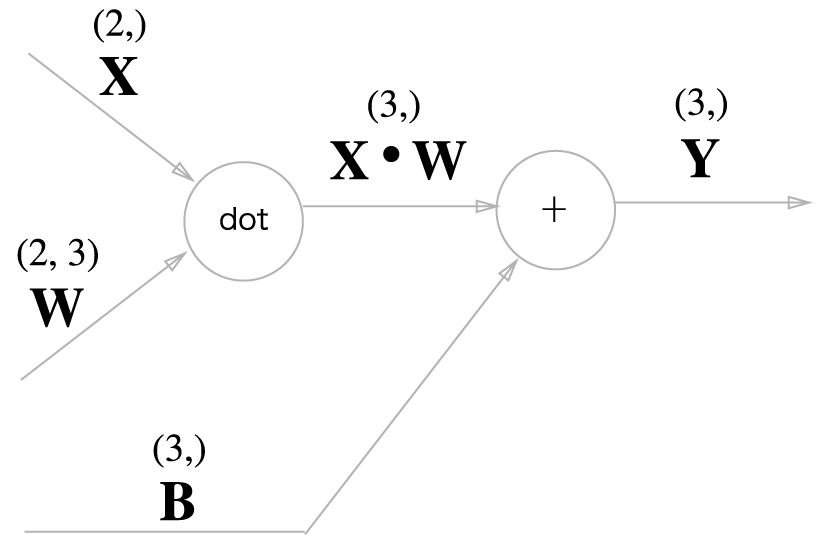

In [126]:
im1 = Image.open('deep_learning_images/fig 5-24.png')
im1

- 내적을 계산하는 노드 'dot'
- 변수(행렬)의 형상(shape)을 괄호로 표기

####      

#### 전개 결과 생략하고 얻은 식

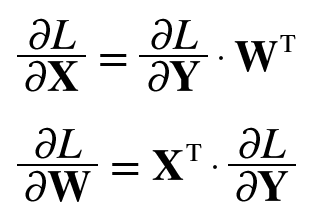

In [135]:
im1 = Image.open('deep_learning_images/e 5.13.png')
im2 = Image.open('deep_learning_images/e 5.14.png')
im3 = Image.open('deep_learning_images/fig 5-26.png')
im1

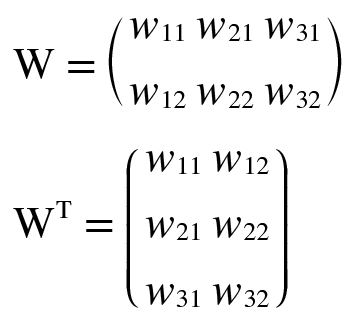

In [133]:
im2

![그림](https://image.slidesharecdn.com/ch05-170403044028/95/ch05-19-638.jpg?cb=1491194513)

####     

#### 배치용 Affine 계층

- 위에서 고려한 Affine 계층은 X 하나만을 고려한 것 
- N개를 묶어 순전파하는 경우, 즉 배치용 Affine 계층을 해볼 것

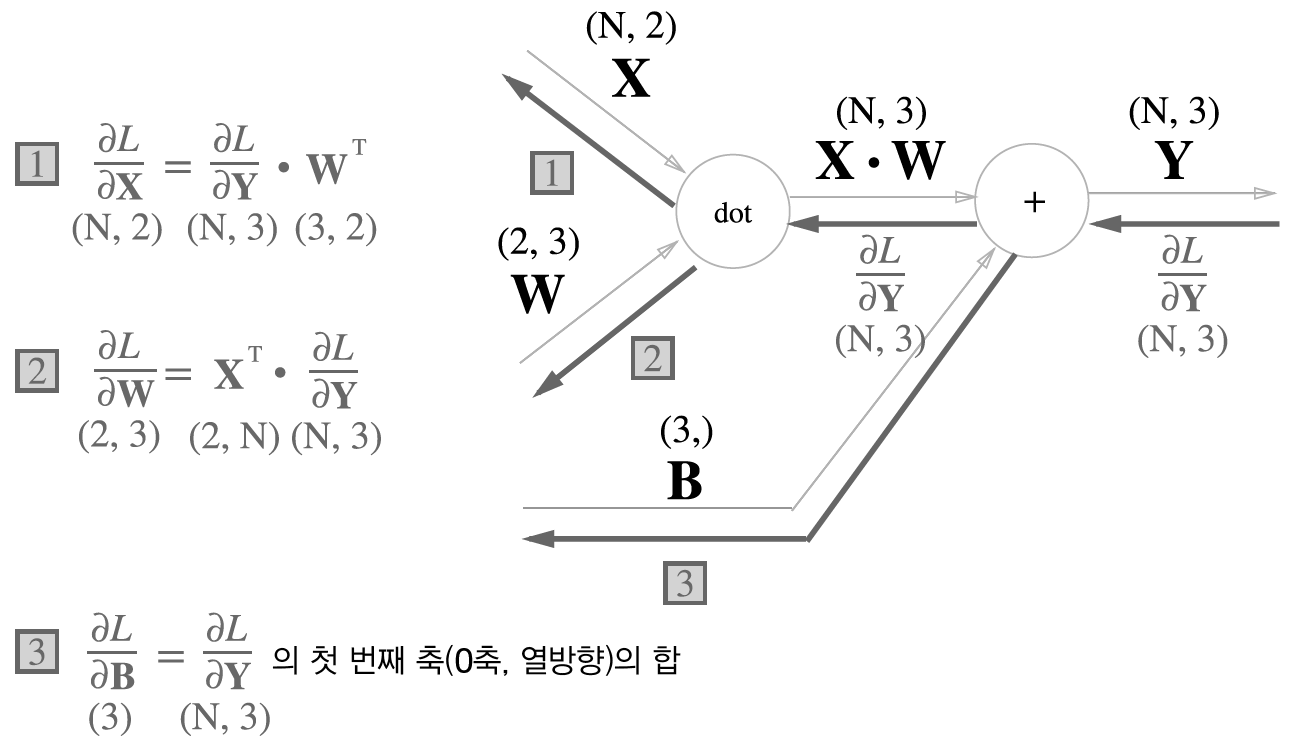

In [139]:
im1 = Image.open('deep_learning_images/fig 5-27.png')
im1

- 기존과 다른부분은 X의 형상이 (N, 2)으로 바뀐 것 

####    

#### 구현

In [145]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None 
        
    def forward(self, x):
        self.x =x 
        out = np.dot(x, self.W) + self.b
        
        return out
    
    
    def backward(self, x):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

####     

### Softmax-with-Loss 계층

- 입력값을 정규화하여 출력

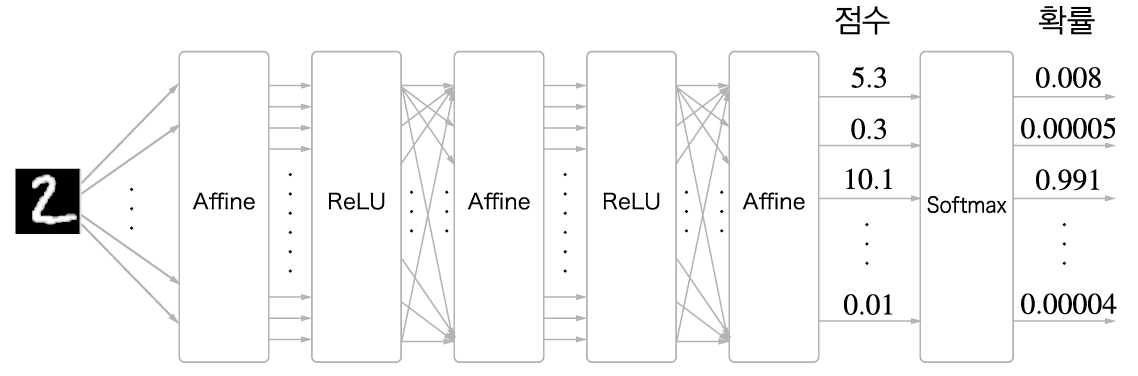

In [149]:
im1 = Image.open('deep_learning_images/fig 5-28.png')
im1

- 입력이미지가 Affine 계층과 ReLU 계층을 통과하여 변환되고 마지막 Softmax 계층에 의하여 10개 입력이 정규화
- 신경망의 작업은 학습과 추론 파트인데 추론할때는 소프트맥스 함수를 사용하지않는다.
- 신경망 추론에서 답을 하나만 내는 경우에는 가장 높은 값(score)만 알면 되므로 정규화가 필요 없기 때문

####      

#### 소프트맥스 계층의 계산 그래프

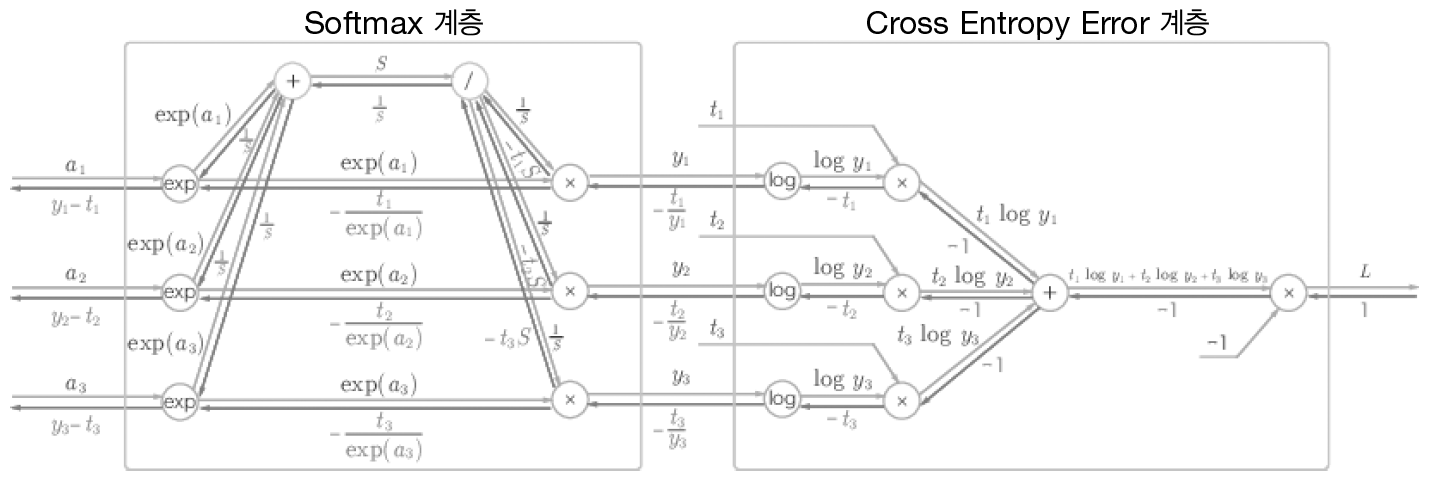

In [152]:
im1 = Image.open('deep_learning_images/fig 5-29.png')
im1

#### 위 그래프 간소화 버젼

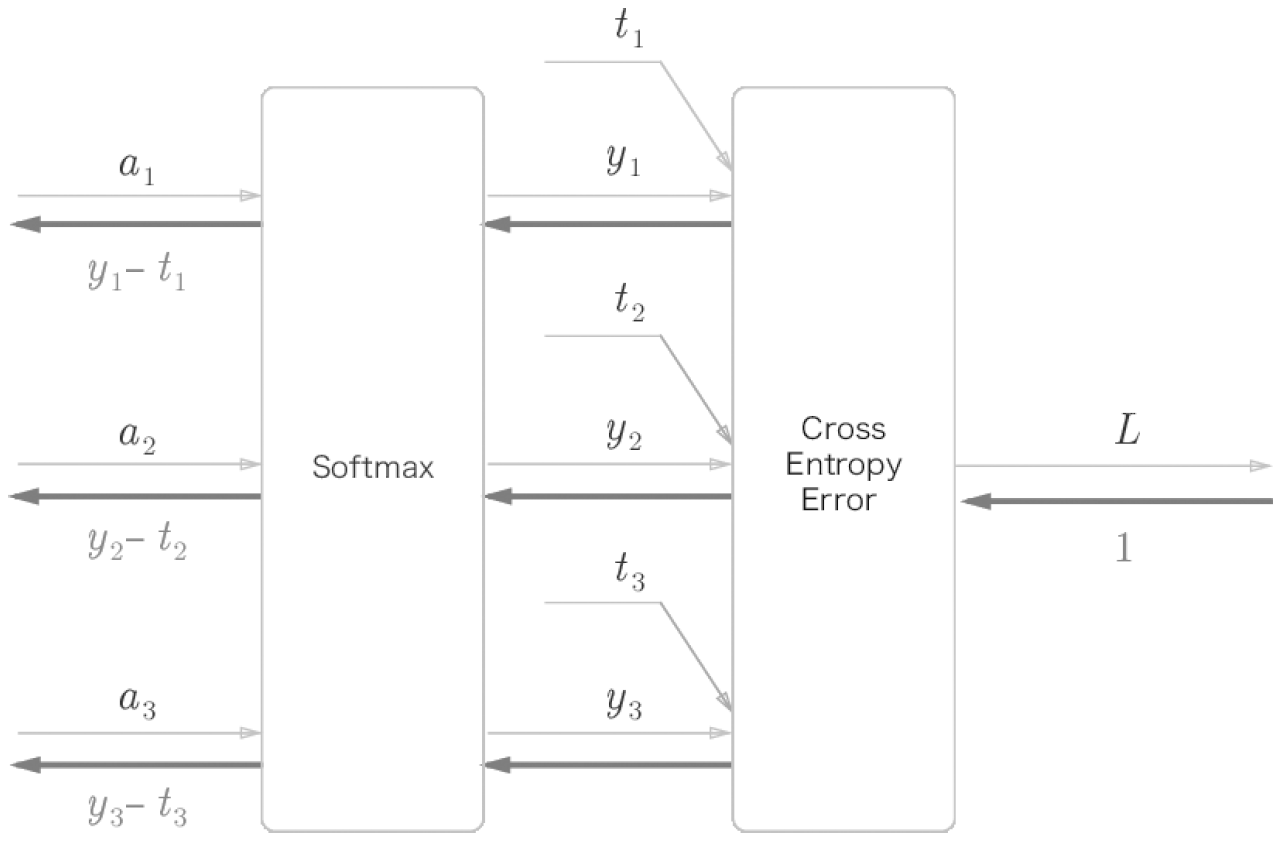

In [154]:
im1 = Image.open('deep_learning_images/fig 5-30.png')
im1

- 위 그래프에서 소프트맥스 함수는 Softmax 계층으로 교차 엔트로피 오차는 Cross Entropy Error 계층으로 표기
- 3클래스로 분류를 가정하고 이전계층에서 3개의 입력(score)를 받는다.
- softmax 계층은 입력 (a1, a2, a3)를 정규화하여 (y1, y2 ,y3)를 출력
- Cross Entropy Error 계층은 softmax의 출력 (y1, y2, y3)와 정답 레이블 (t1, t2, t3)를 받고 이들 데이터로 손실 L을 출력
- Softmax 계층의 역전파는 (y1 - t1 , y2 - t2 , y3 - t3)인 말끔한 결과를 내놓음( softmax 계층의 출력과 정답의 차분)
- 즉 신경망의 역전파에서는 오차가 앞 계층에 전해지는 것 

####     

#### 구현코드

In [158]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None   # 손실
        self.y = None      # softmax의 출력
        self.t = None      # 정답 레이블(원-핫 벡터)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y , self.t)
        return self.loss
    
    def backward(self, dout = 1 ):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

####     

### 오차 역전파법 구현하기

#### 신경망 개념 복습
- 전제 신경망에는 적응 가능한 '가중치'와 '편향' 존재, 이것을 훈련데이터에 적응하도록 조정하는 과정이 '학습' 학습의 과정은 다음과 같다.
- 1단계 - 미니배치 :  훈련 데이터중 일부를 무작위 추출. 선별한 데이터를 미니배치라하고 미니배치의 손실 함수 값을 줄이는 것이 목표
- 2단계 - 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수 기울기 구함. 기울기는 손실 함수의 값을 가장 작게하는 방향 제시
- 3단계 - 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
- 4단계 - 1~3 단계를 반복한다.
- 오차역적파법을 적용하면 수치미분에 비해 기울기를 효율적이고 빠르게 구할 수 있다.

####     



### 구현

#### TwoLayerNet 클래스의 인스턴스 변수
- params : 딕셔너리 변수로 신경망의 매개변수를 보관
- layers : 순서가 있는 딕셔너리 변수로 신경망의 계층을 보관 -> layers[Affine1], layers[Relu1] , layers[Affine2]
- lastLayer : 신경망의 마지막 계층 -> SoftmaxWithLoss 계층 

####     

#### TwoLayerNet 클래스의 인스턴스 변수
- __init : 초기화 수행
- predict(self, x) : 예측 수행
- loss(self, x,t) : 손실 함수의 값을 구함
- accuracy :  정확도구함
- numerical_gradient : 가중치 매개변수의 기울기를 수치 미분 방식으로 구함
- gradient : 오차역전파 방식으로 구함

####    

#### 구현 코드

In [170]:

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()    # 순서가 있는 딕셔너리 
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

####    

#### 기울기 검증하기

In [173]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W2:1.50146558242e-11
W1:4.14662038141e-13
b1:1.47737245289e-12
b2:1.21236357065e-10


- 수치미분의 역할은 오차역전파법의 결과가 잘나왔는지 확인용임

####    

#### 오차역전파법 이용 학습 구현

In [177]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.0786 0.0774
0.788116666667 0.7947
0.877916666667 0.8827
0.899233333333 0.9022
0.9086 0.9101
0.914116666667 0.9168
0.920216666667 0.9212
0.92405 0.9251
0.927683333333 0.9284
0.932016666667 0.9334
0.934316666667 0.9356
0.937283333333 0.9394
0.93935 0.9395
0.942033333333 0.9419
0.944633333333 0.9433
0.945883333333 0.9442
0.947666666667 0.9456


- 앞장과 동일하며 기울기를 오차역전파법으로 구현한다는 차이뿐

####    

### 정리

- 계산 그래프를 이용하여 과정을 시각적 파악
- 계산 그래프의 노드는 국소적 계산으로 구성되며 이것을 조합해 전체 계산 구성
- 계산 그래프의 순전파는 통상적인 계산 /  역전파는 각 노드의 미분을 구함
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다. (오차역전파법)